In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [6]:
# Raw Data Loading
# 현재 사용하는 데이터의 크기가 약 500MB 정도이기 때문에
# google drive에서 colab으로 파일을 불러올 수 있었다!
# 파일이 더 커지면 못 불러온다!
# (그러면 어떻게 하나요? Google Storage Service) => 돈이 든다!
df = pd.read_csv('/content/drive/MyDrive/Colab임시폴더/cat_dog/train.csv')
display(df.head())
print(df.shape)   # (25000, 6401)

,label,0,1,2,3,4,5,6,7,8,...,6390,6391,6392,6393,6394,6395,6396,6397,6398,6399
0,1,-94,-85,-83,-89,-81,-83,-71,-127,-125,...,120,117,119,119,123,123,119,113,111,112
1,1,36,46,49,18,69,76,54,48,89,...,-108,-113,-111,-109,124,113,-125,-128,-122,122
2,1,25,24,24,22,24,16,17,22,72,...,-123,-128,127,123,122,117,122,117,117,115
3,1,-88,-127,-73,-80,-122,-109,-102,-107,-117,...,-112,-108,-106,-106,-106,-107,-112,-103,-103,-105
4,0,-96,-92,-102,-97,-88,-74,-72,-81,-73,...,17,21,17,9,8,8,8,23,28,28


(25000, 6401)


In [7]:
x_data = df.drop('label', axis=1, inplace=False).values
t_data = df['label'].values

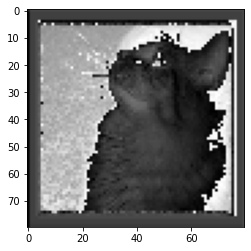

In [8]:
plt.imshow(x_data[150:151].reshape(80,80), cmap='gray')
plt.show()

In [9]:
# data split
train_x_data, test_x_data, train_t_data, test_t_data = \
train_test_split(x_data,
                t_data,
                test_size=0.3,
                stratify=t_data)

# Normalizeation(정규화)
scaler = MinMaxScaler()
scaler.fit(train_x_data)

norm_train_x_data = scaler.transform(train_x_data)
norm_test_x_data = scaler.transform(test_x_data)

In [10]:
# model 생성

model = Sequential()

# CNN - Feature Extraction

model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 activation='relu',
                 padding='SAME',
                 input_shape=(80,80,1)))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,
                 kernel_size=(3,3),
                 activation='relu',
                 padding='SAME'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 activation='relu',
                 padding='SAME'))

model.add(MaxPooling2D(pool_size=(2,2)))

# FC Layer
model.add(Flatten())
model.add(Dropout(rate=0.5))   # overfitting을 방지하기 위해 노드를 50%만 사용

# Hidden Layer
model.add(Dense(units=256,
                activation='relu'))

# Output Layer
model.add(Dense(units=1,
                activation='sigmoid'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 80, 80, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 40, 40, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 40, 40, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 20, 20, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 64)        73792     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 64)       0

In [11]:
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(norm_train_x_data.reshape(-1,80,80,1),
                    train_t_data.reshape(-1,1),
                    epochs=200,
                    batch_size=100,
                    verbose=1,
                    validation_split=0.3)

Epoch 1/200
123/123 [==============================] - 27s 107ms/step - loss: 0.6790 - accuracy: 0.5534 - val_loss: 0.6464 - val_accuracy: 0.6200
Epoch 2/200
123/123 [==============================] - 12s 96ms/step - loss: 0.6402 - accuracy: 0.6216 - val_loss: 0.6107 - val_accuracy: 0.6554
Epoch 3/200
123/123 [==============================] - 13s 103ms/step - loss: 0.6124 - accuracy: 0.6585 - val_loss: 0.5857 - val_accuracy: 0.6819
Epoch 4/200
123/123 [==============================] - 12s 96ms/step - loss: 0.5852 - accuracy: 0.6858 - val_loss: 0.5704 - val_accuracy: 0.6931
Epoch 5/200
123/123 [==============================] - 11s 89ms/step - loss: 0.5671 - accuracy: 0.7014 - val_loss: 0.5685 - val_accuracy: 0.7051
Epoch 6/200
123/123 [==============================] - 11s 89ms/step - loss: 0.5543 - accuracy: 0.7134 - val_loss: 0.5720 - val_accuracy: 0.6939
Epoch 7/200
123/123 [==============================] - 11s 89ms/step - loss: 0.5426 - accuracy: 0.7195 - val_loss: 0.5399 - val_

In [12]:
# test data를 이용한 evaluation
result = model.evaluate(norm_test_x_data.reshape(-1,80,80,1),
                        test_t_data.reshape(-1,1))
print(result)
#         loss               accuracy
# [0.8284232020378113, 0.7731999754905701]

235/235 [==============================] - 3s 12ms/step - loss: 0.8284 - accuracy: 0.7732
[0.8284232020378113, 0.7731999754905701]


In [13]:
model.save('/content/drive/MyDrive/Colab임시폴더/cat_dog/full_data_model/full_data_model.h5')

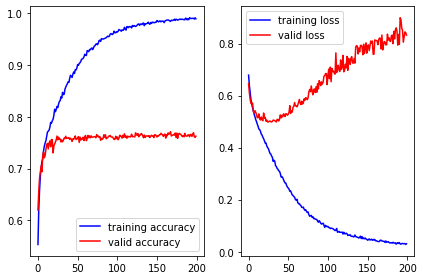

In [14]:
# history 객체를 이용해서 간단하게 학습과정에 대한 그래프를 그려보자!

train_acc = history.history['accuracy']
train_loss = history.history['loss']

valid_acc = history.history['val_accuracy']
valid_loss = history.history['val_loss']

figure = plt.figure()
ax1 = figure.add_subplot(1,2,1)
ax2 = figure.add_subplot(1,2,2)

ax1.plot(train_acc, color='b', label='training accuracy')
ax1.plot(valid_acc, color='r', label='valid accuracy')
ax1.legend()

ax2.plot(train_loss, color='b', label='training loss')
ax2.plot(valid_loss, color='r', label='valid loss')
ax2.legend()

plt.tight_layout()
plt.show()

# overfitting이 일어났다
# epoch이 증가하면 loss는 감소해야 하는데
# valid data에 대해서 loss 값이 점점 증가한다.
# epoch수, filter수, activation 등을 정하는 게 어렵다
# 데이터가 적으면 결과가 더 안좋게 나올 것이다.  